In [71]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [83]:
# Generate dataset for training unsupervised model
X, y = make_moons(n_samples=250, noise=0.08)

# Convert the dataset to pandas df
df = pd.DataFrame(X)

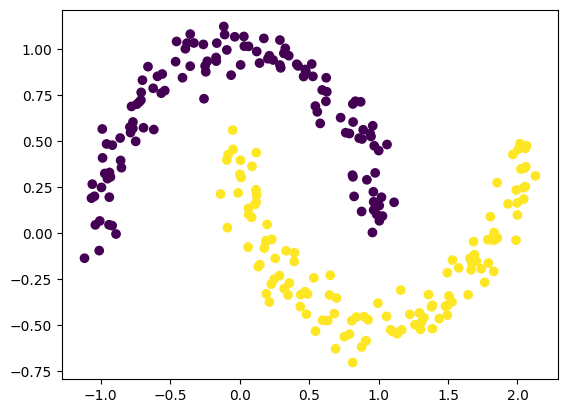

In [84]:
# Visualize the data
plt.scatter(df[0], df[1], c=y)
plt.show()

## Model Training

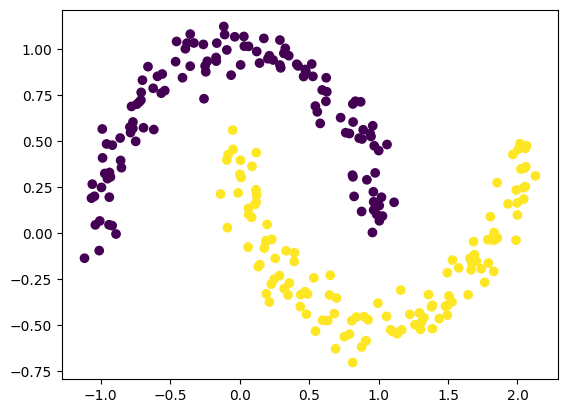

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df) # With the given dataset, scaling is optional but doing it for the purpose of completeness
dbscan = DBSCAN(eps=0.4,  min_samples=5)
dbscan.fit(df_scaled)
plt.scatter(df[0], df[1], c=dbscan.labels_)
plt.show()

## Silhoutee Scoring

In [87]:
# Import the required package for calculating Silhoutee Scoring
from sklearn.metrics import silhouette_score

# Calculate the silhouette score with different epsilon value. More near the score to +1, better the clusstering model is.
sil_coeff = []
for k in [0.1, 0.2, 0.3, 0.4]:
    dbscan = DBSCAN(eps=k)
    dbscan.fit(df_scaled)
    score = silhouette_score(df_scaled, dbscan.labels_)
    sil_coeff.append(score)
    print(f"Score for Epsilon = {k} is: {score}")

Score for Epsilon = 0.1 is: -0.3521034495788149
Score for Epsilon = 0.2 is: 0.2245200261497098
Score for Epsilon = 0.3 is: 0.37401782639854575
Score for Epsilon = 0.4 is: 0.37401782639854575
